##### Red Wine Quality Prediction - Vinayak Ratan

Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
wine_df = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\DSData-master\winequality-red.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Head, tail and sample of the data
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
wine_df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
328,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.0002,3.16,0.67,9.7,6


In [6]:
# Shape of the dataset
wine_df.shape

(1599, 12)

In [7]:
# Data types of columns in the dataset
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
# Column names of the dataset
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# Information of each column
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- we can observe that there as no null values in the given dataset and there are no categorical variables

### Summary Statistics

In [10]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Observations of Statistics
1. Mean is more than the median (i.e. 50th percentile) in all the columns
2. Also, there is a large difference in the 75th percentile and maximum in residual sugar, free sulfur dioxide, total sulfur dioxide
3. the 1st and 2nd observations suggest that there are extreme outliers present in these three columns

## Exploratory data analysis

In [11]:
wine_df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Target/dependent variable is discrete and categorical in nature 
- quality score scale ranges from 3(low quality) to 8(high quality) 
- Only score obtained are between 3 to 8

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


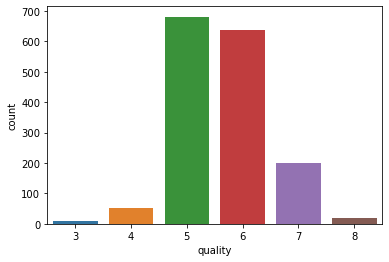

In [12]:
sns.countplot(wine_df['quality'])
print(wine_df['quality'].value_counts())

- Quality has most values concentrated in the categories of 5,6,7
- only few observations are present in the categories in 3 and 8

In [13]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
# Checking for null values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Dependent Variables
dv = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

<AxesSubplot:>

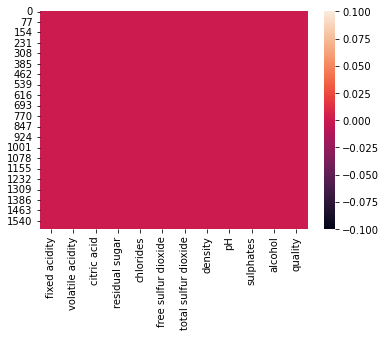

In [16]:
 sns.heatmap(wine_df.isnull())

- Heatmap clearly shows data has no missing values

### Correlation

In [17]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

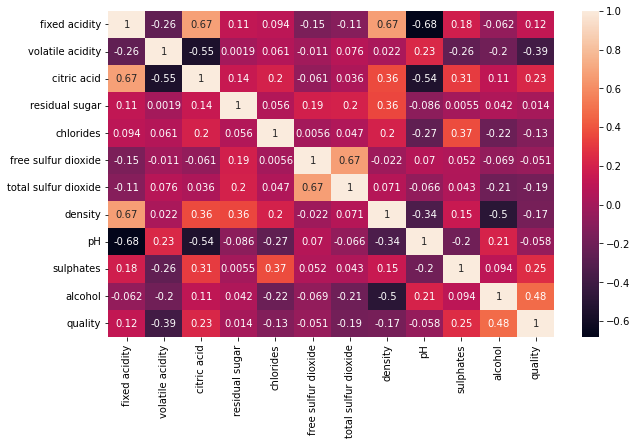

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(wine_df.corr(), annot = True) # cmap=for different colors

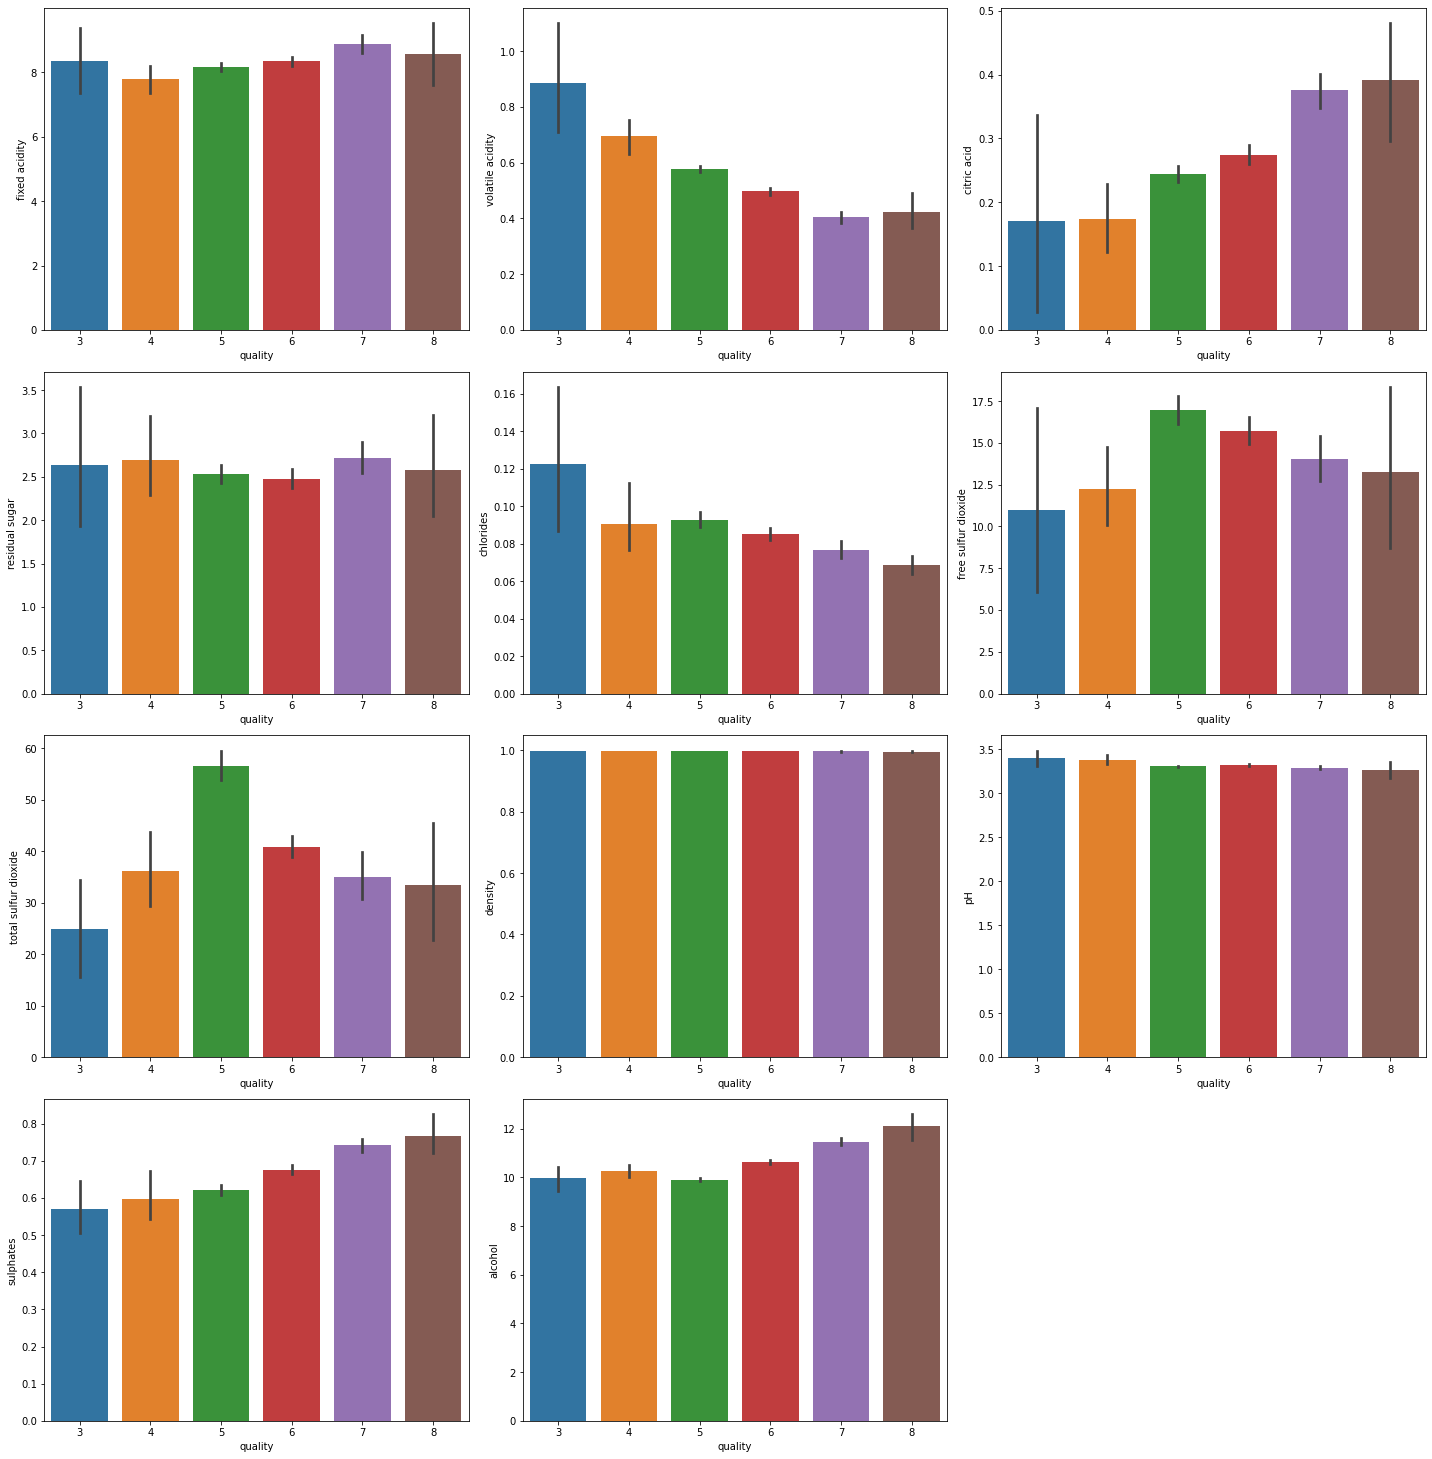

In [19]:
plt.figure(figsize=(20,25), facecolor ='white')
plot_no = 1
for i in dv:
    if plot_no <= 11:
        ax = plt.subplot(5,3,plot_no)
        sns.barplot(x='quality', y= i, data = wine_df )
    plot_no += 1
plt.tight_layout()

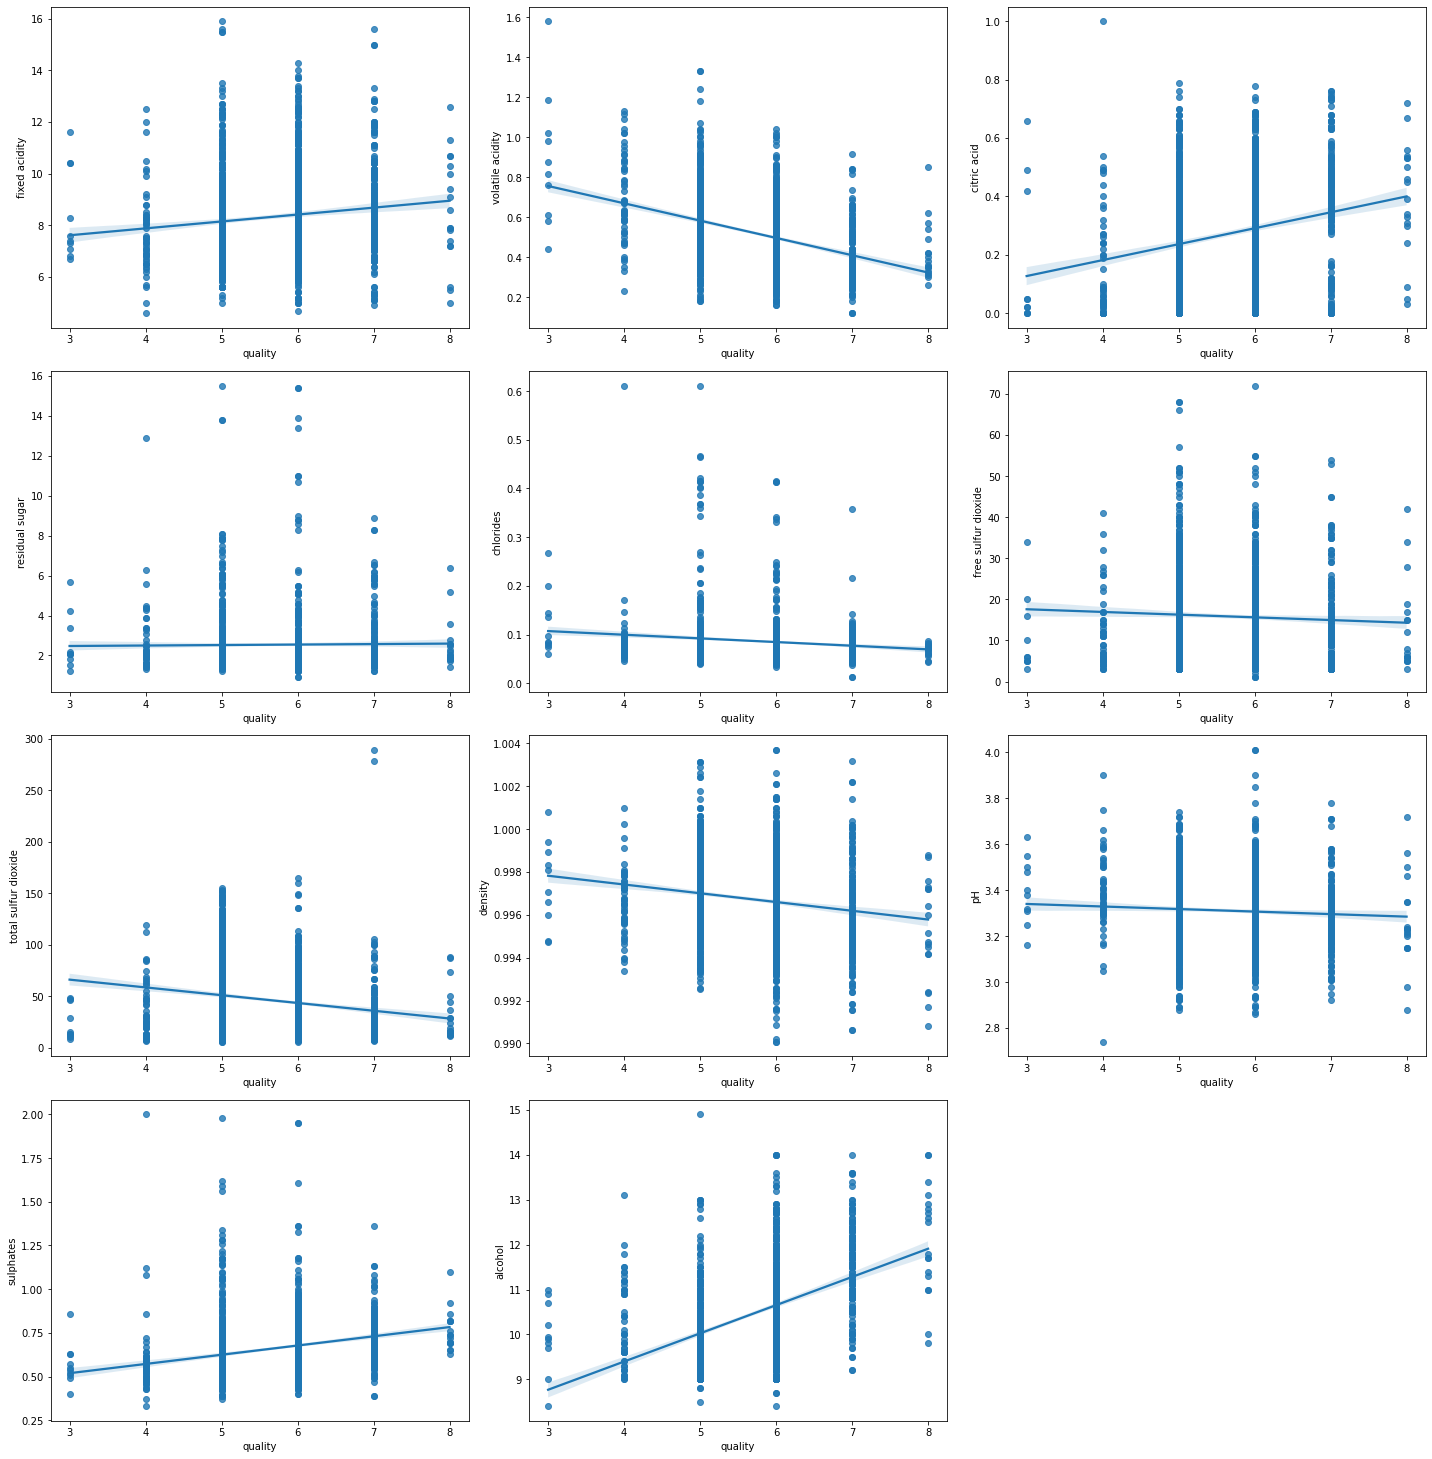

In [20]:
plt.figure(figsize=(20,25), facecolor ='white')
plot_no = 1
for i in dv:
    if plot_no <= 11:
        ax = plt.subplot(5,3,plot_no)
        sns.regplot(x='quality', y= i, data = wine_df )
    plot_no += 1
plt.tight_layout()

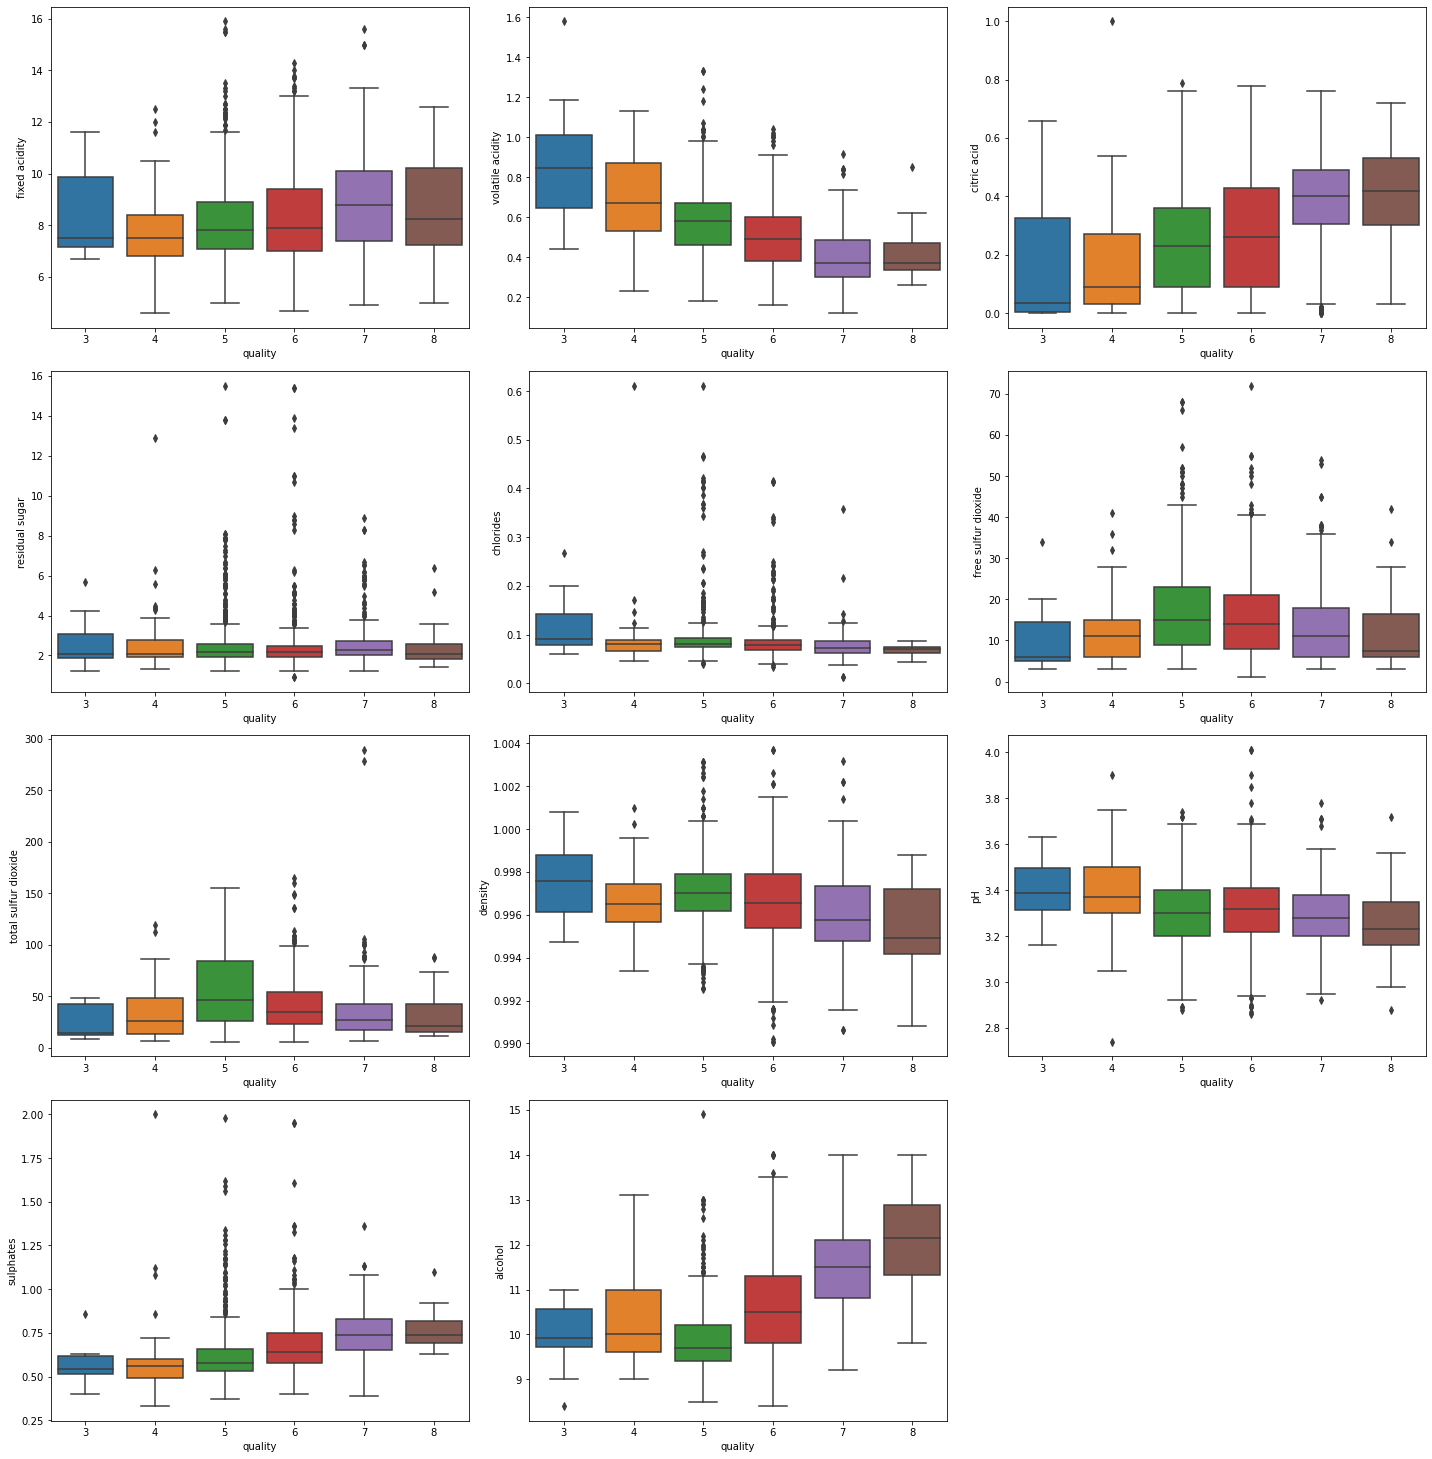

In [21]:
plt.figure(figsize=(20,25), facecolor ='white')
plot_no = 1
for i in dv:
    if plot_no <= 11:
        ax = plt.subplot(5,3,plot_no)
        sns.boxplot(x='quality', y= i, data = wine_df )
    plot_no += 1
plt.tight_layout()

In [22]:
wine_df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

###### Observations
- From correlation matrix and the plots 
    - Light shades are highly correlated
    - Alcohol is highly correlated with quality compared with other features
    - citric acid, fixed acidity and sulphates have good correlation quality
    - residual sugar have weak correlation 
    - volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density and pH are negatively correlated
    - volatile acidity is highly negatively correlated with quality
    - density is highly postively correlated with residual sugar
    - free sulphuric acid is highly correlated with total sulphur dioxide
    - alcohol is highly negatively correlated with density
    - pH content is almost same in each quality of wine from low to high
    - We can drop volatile acidity from the dataset if we are doing the linear regression
    - Most of features have outliers present except for citric acid shown using box plot
    - As alcohol content increases the wine quality also improves as seen with regression plot and barplot
    - Other features have either decreasing trend or increasing or it is flat with quality (Regression plot)

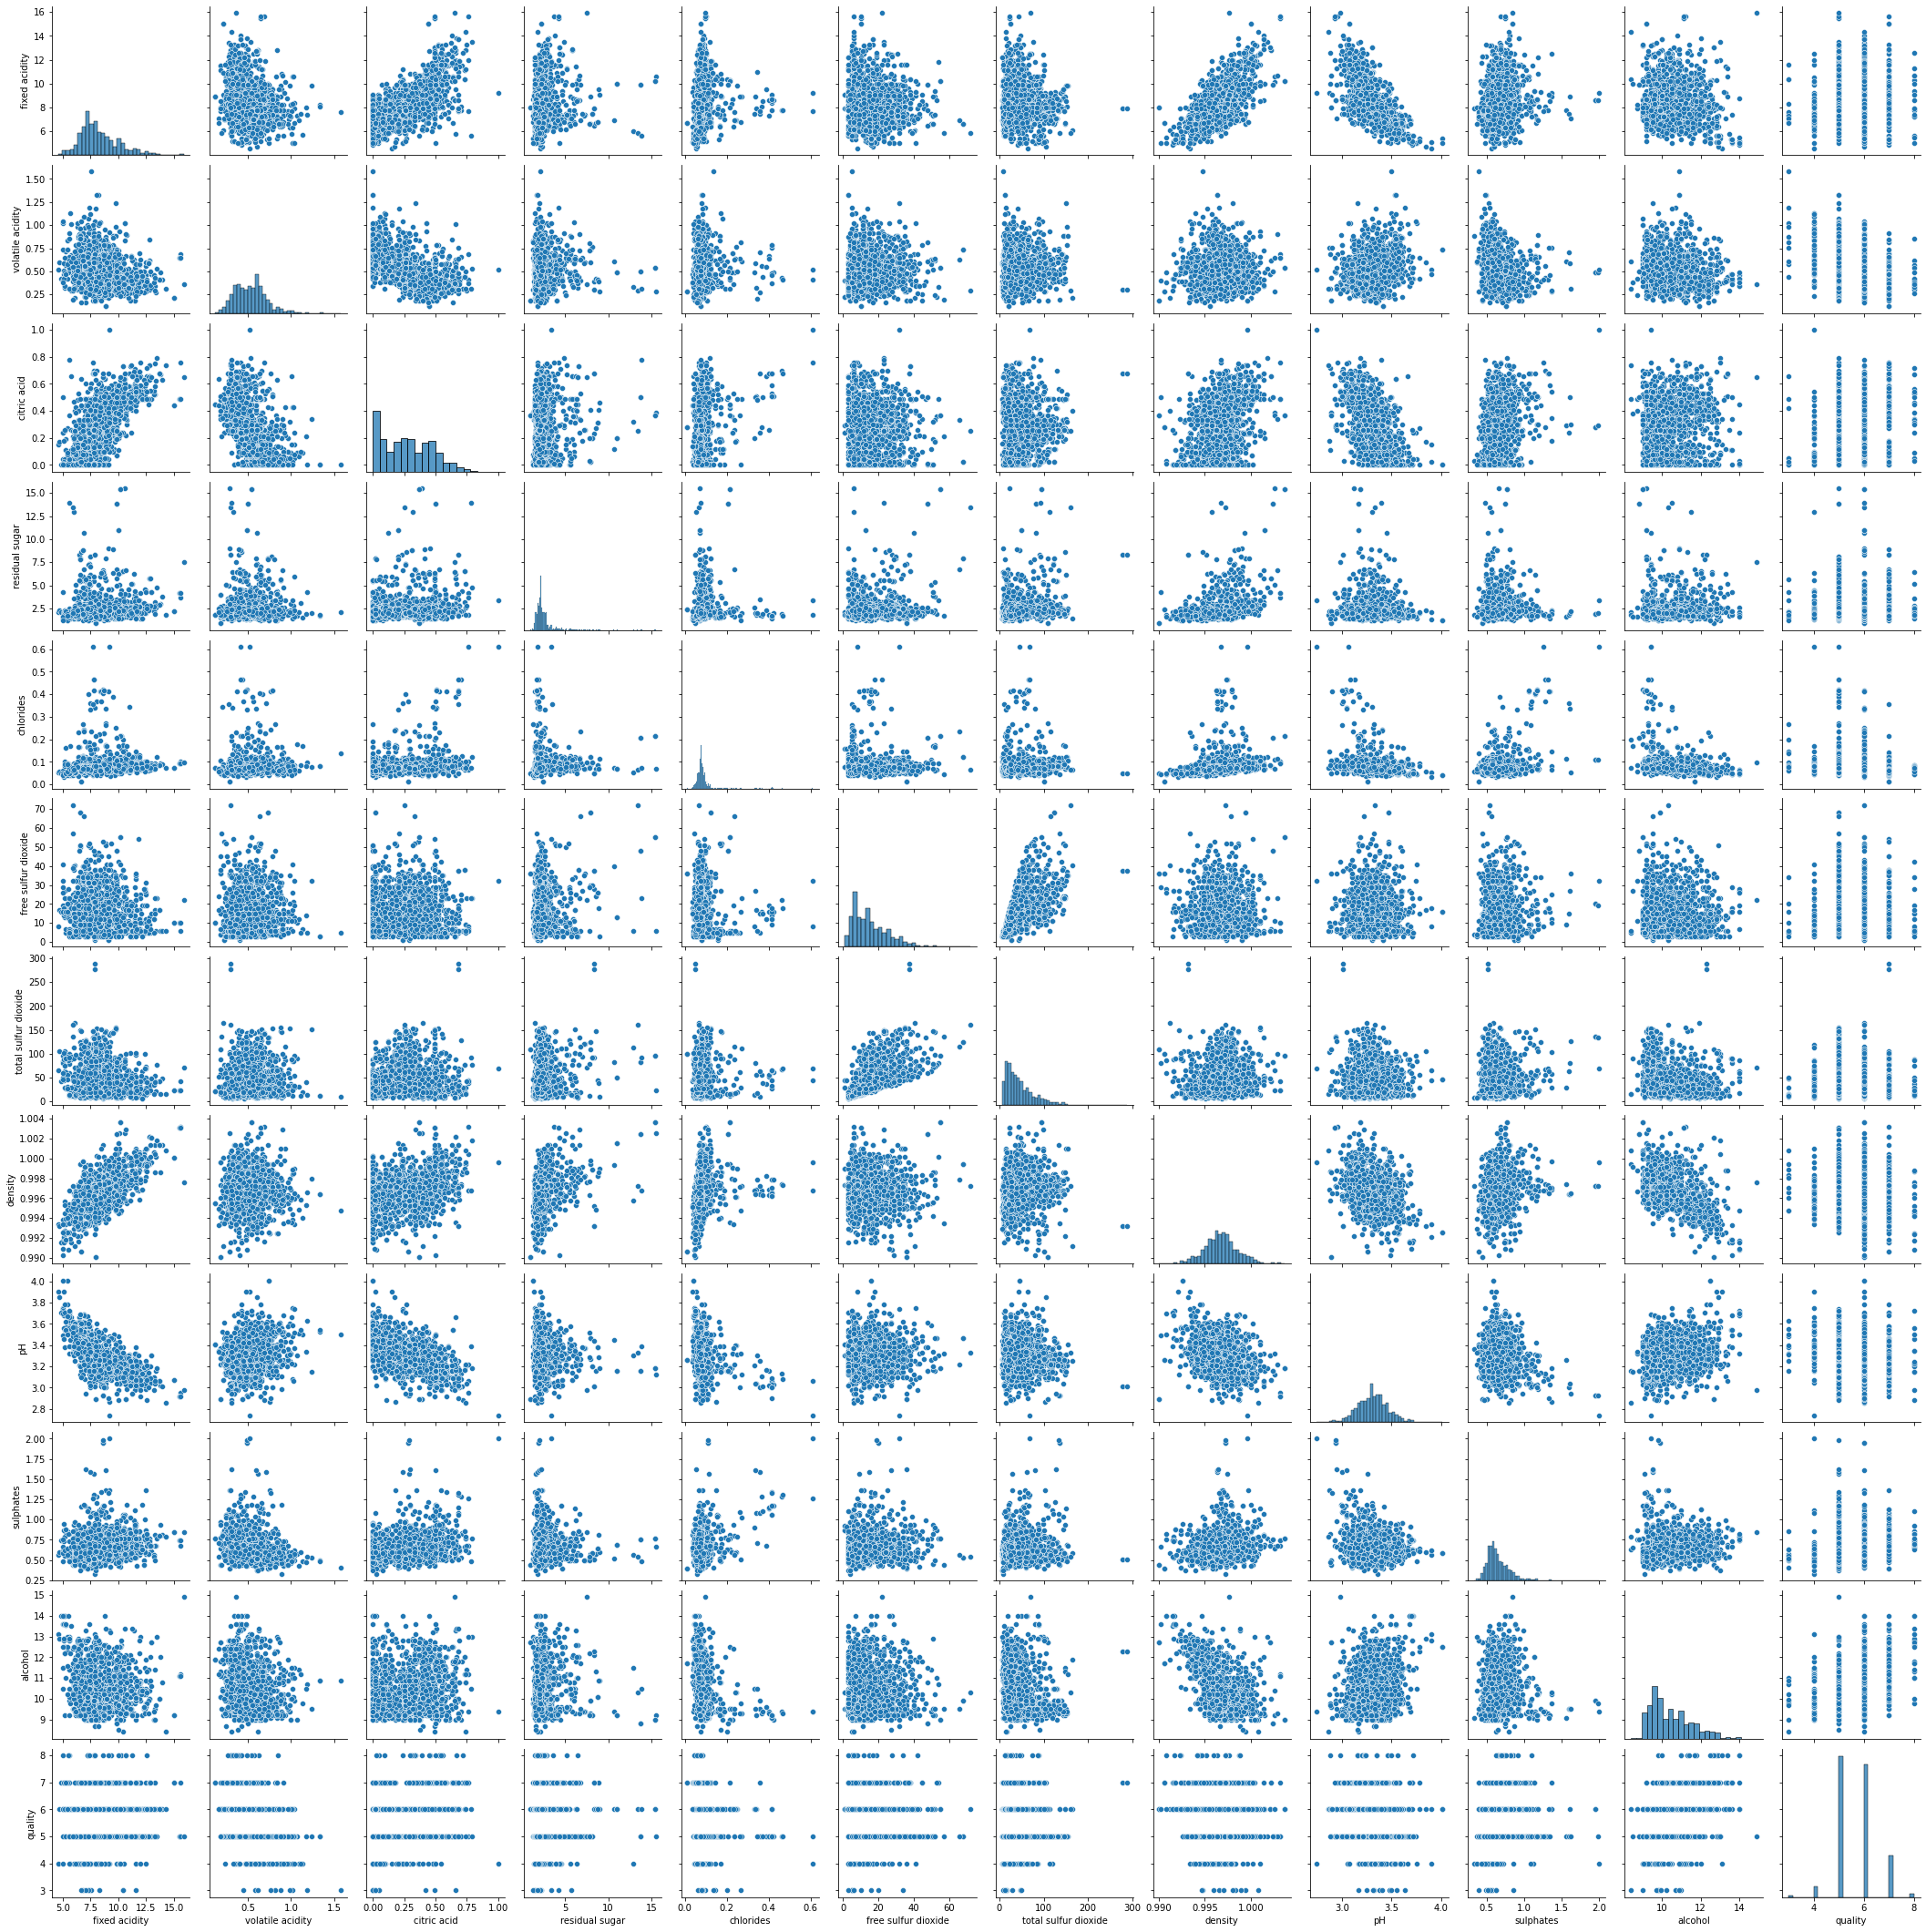

In [23]:
sns.pairplot(data = wine_df)

### Outliers

In [24]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

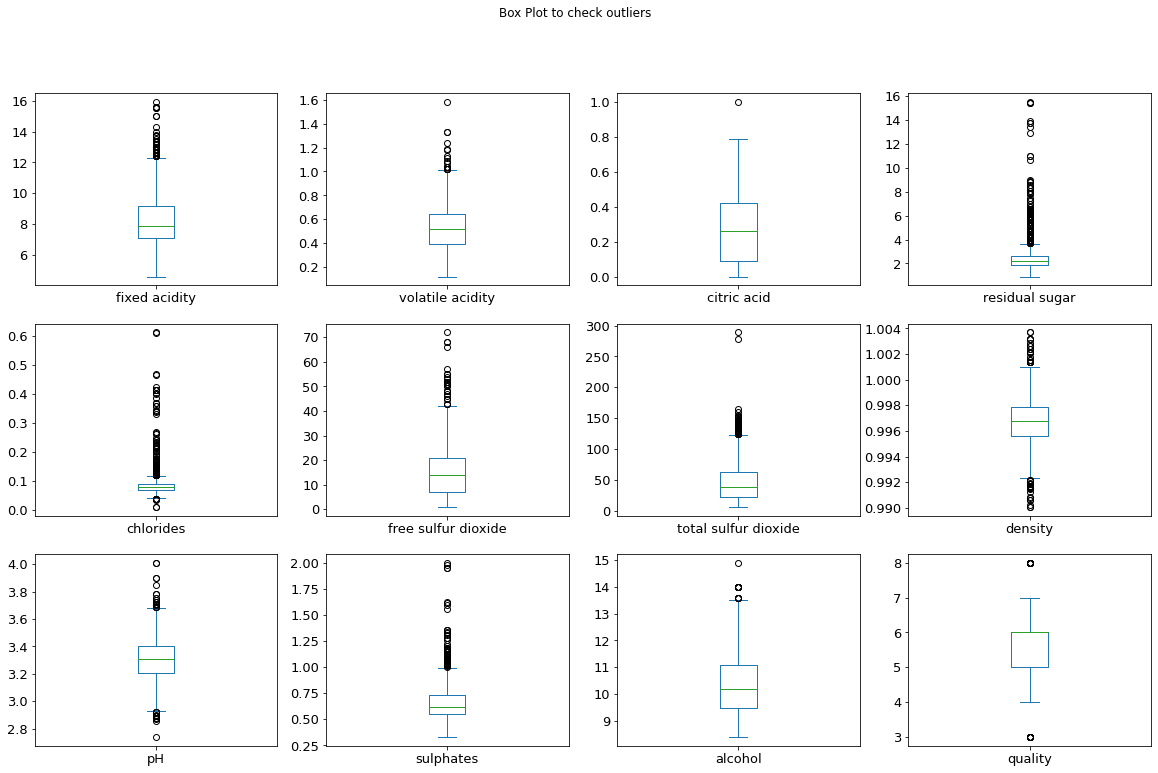

In [25]:
wine_df.plot(kind='box', subplots = True, layout = (3,4), figsize = (20,12), title = "Box Plot to check outliers", fontsize = 13)

### Checking for Skewness

In [26]:
wine_df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

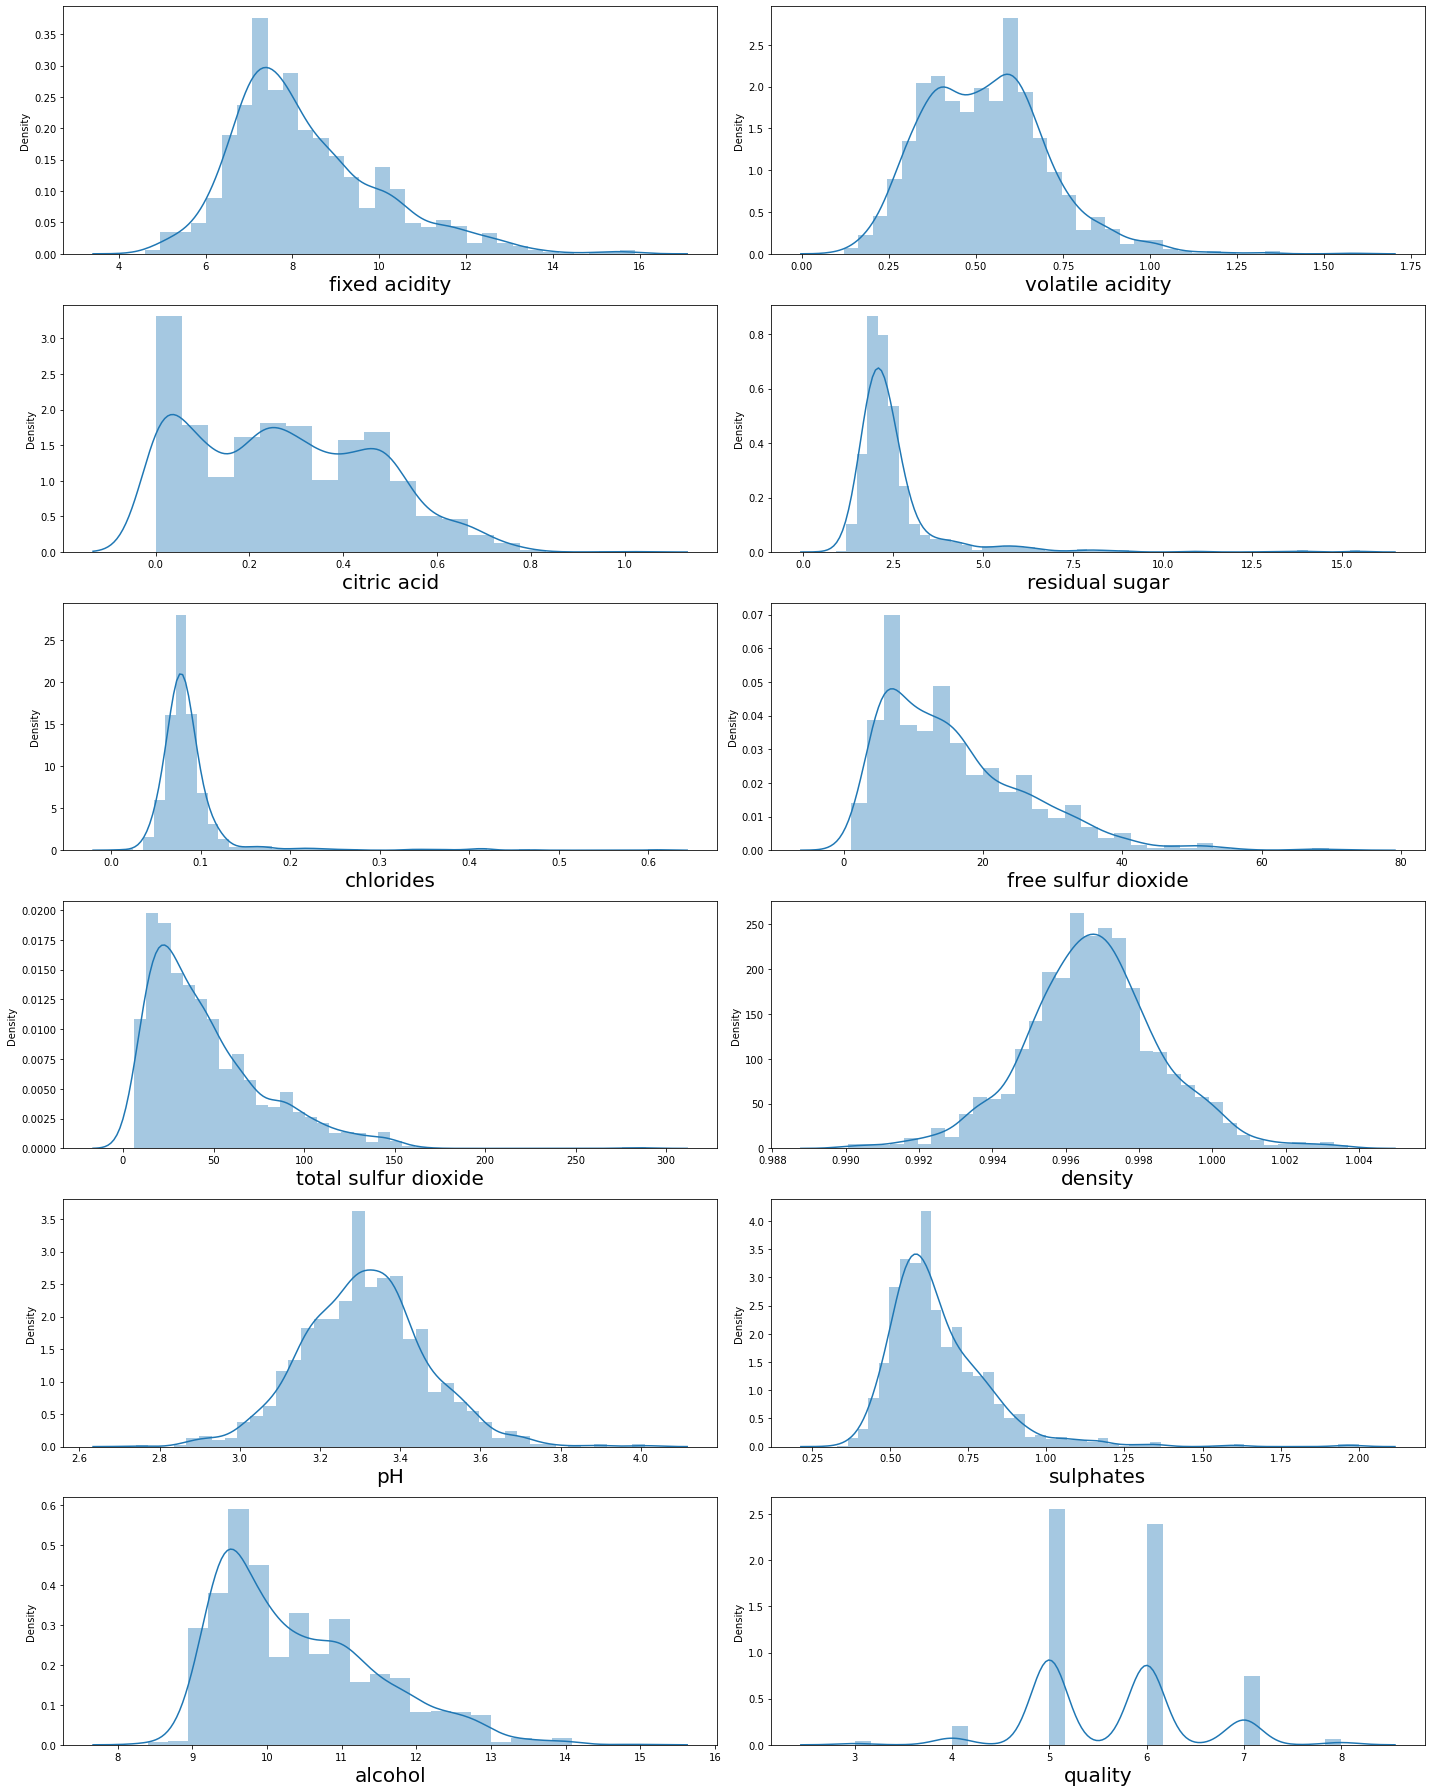

In [27]:
# Distribution Plot - Done for only numerical column not for categoical data
plt.figure(figsize=(20,25))
plot_no = 1
for column in wine_df:
    if plot_no <= 12:
        ax = plt.subplot(6,2,plot_no)
        sns.distplot(wine_df[column])
        plt.xlabel(column, fontsize = 20)

    plot_no += 1
plt.tight_layout()

- Only density and pH data are normally distributed
- other features are right skewed/ positively skewed

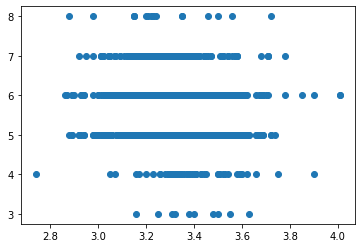

In [28]:
# bivariate analysis
plt.scatter(wine_df['pH'], wine_df['quality'])

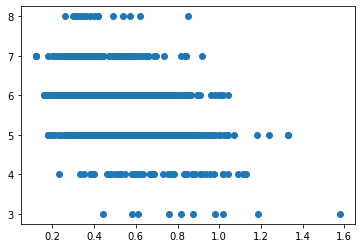

In [29]:
plt.scatter(wine_df['volatile acidity'], wine_df['quality'])

In [30]:
# Since the volatile acidity is highly negatively correlated.we will drop it.
wine_df.drop('volatile acidity', axis=1, inplace = True)
wine_df.sample()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,8.1,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5


In [31]:
wine_df.shape

(1599, 11)

### Removing Outliers

In [32]:
from scipy.stats import zscore
z_wine = np.abs(zscore(wine_df))
z_wine

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [33]:
# List of array containing z-score greater than 3
np.where(z_wine>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
          57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
         109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
         169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
         291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
         396,  400,  400,  442,  442,  451,  459,  467,  480,  480,  494,
         515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  584,
         588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
         652,  652,  672,  684,  690,  692,  692,  695,  723,  730,  754,
         776,  777,  795,  821,  832,  836,  837,  889,  899,  911,  917,
         923,  925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074,
        1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186,
        1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288,
        1289, 1295, 1296, 1299, 1300, 

In [34]:
z_wine.shape

(1599, 11)

In [35]:
z_wine.iloc[13,8]

5.32210116796055

In [36]:
wine_df_new = wine_df[(z_wine<3).all(axis=1)]
wine_df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
# Checking the shape of the dataset before and after removing outliers
print("Old DataFrame:-", wine_df.shape)
print("New DataFrame:-", wine_df_new.shape)
print('Total dropped rows:-', wine_df.shape[0]-wine_df_new.shape[0])

Old DataFrame:- (1599, 11)
New DataFrame:- (1458, 11)
Total dropped rows:- 141


In [38]:
# Percentage loss of data
loss_percent_wine = (1599-1458)/1458*100
print(loss_percent_wine,'%')

9.670781893004115 %


In [39]:
# Checking the skewness after removing outliers
wine_df_new.skew()

fixed acidity           0.827264
citric acid             0.297781
residual sugar          2.457646
chlorides               2.288587
free sulfur dioxide     0.873162
total sulfur dioxide    1.183539
density                 0.061110
pH                      0.109577
sulphates               0.891997
alcohol                 0.754976
quality                 0.400875
dtype: float64

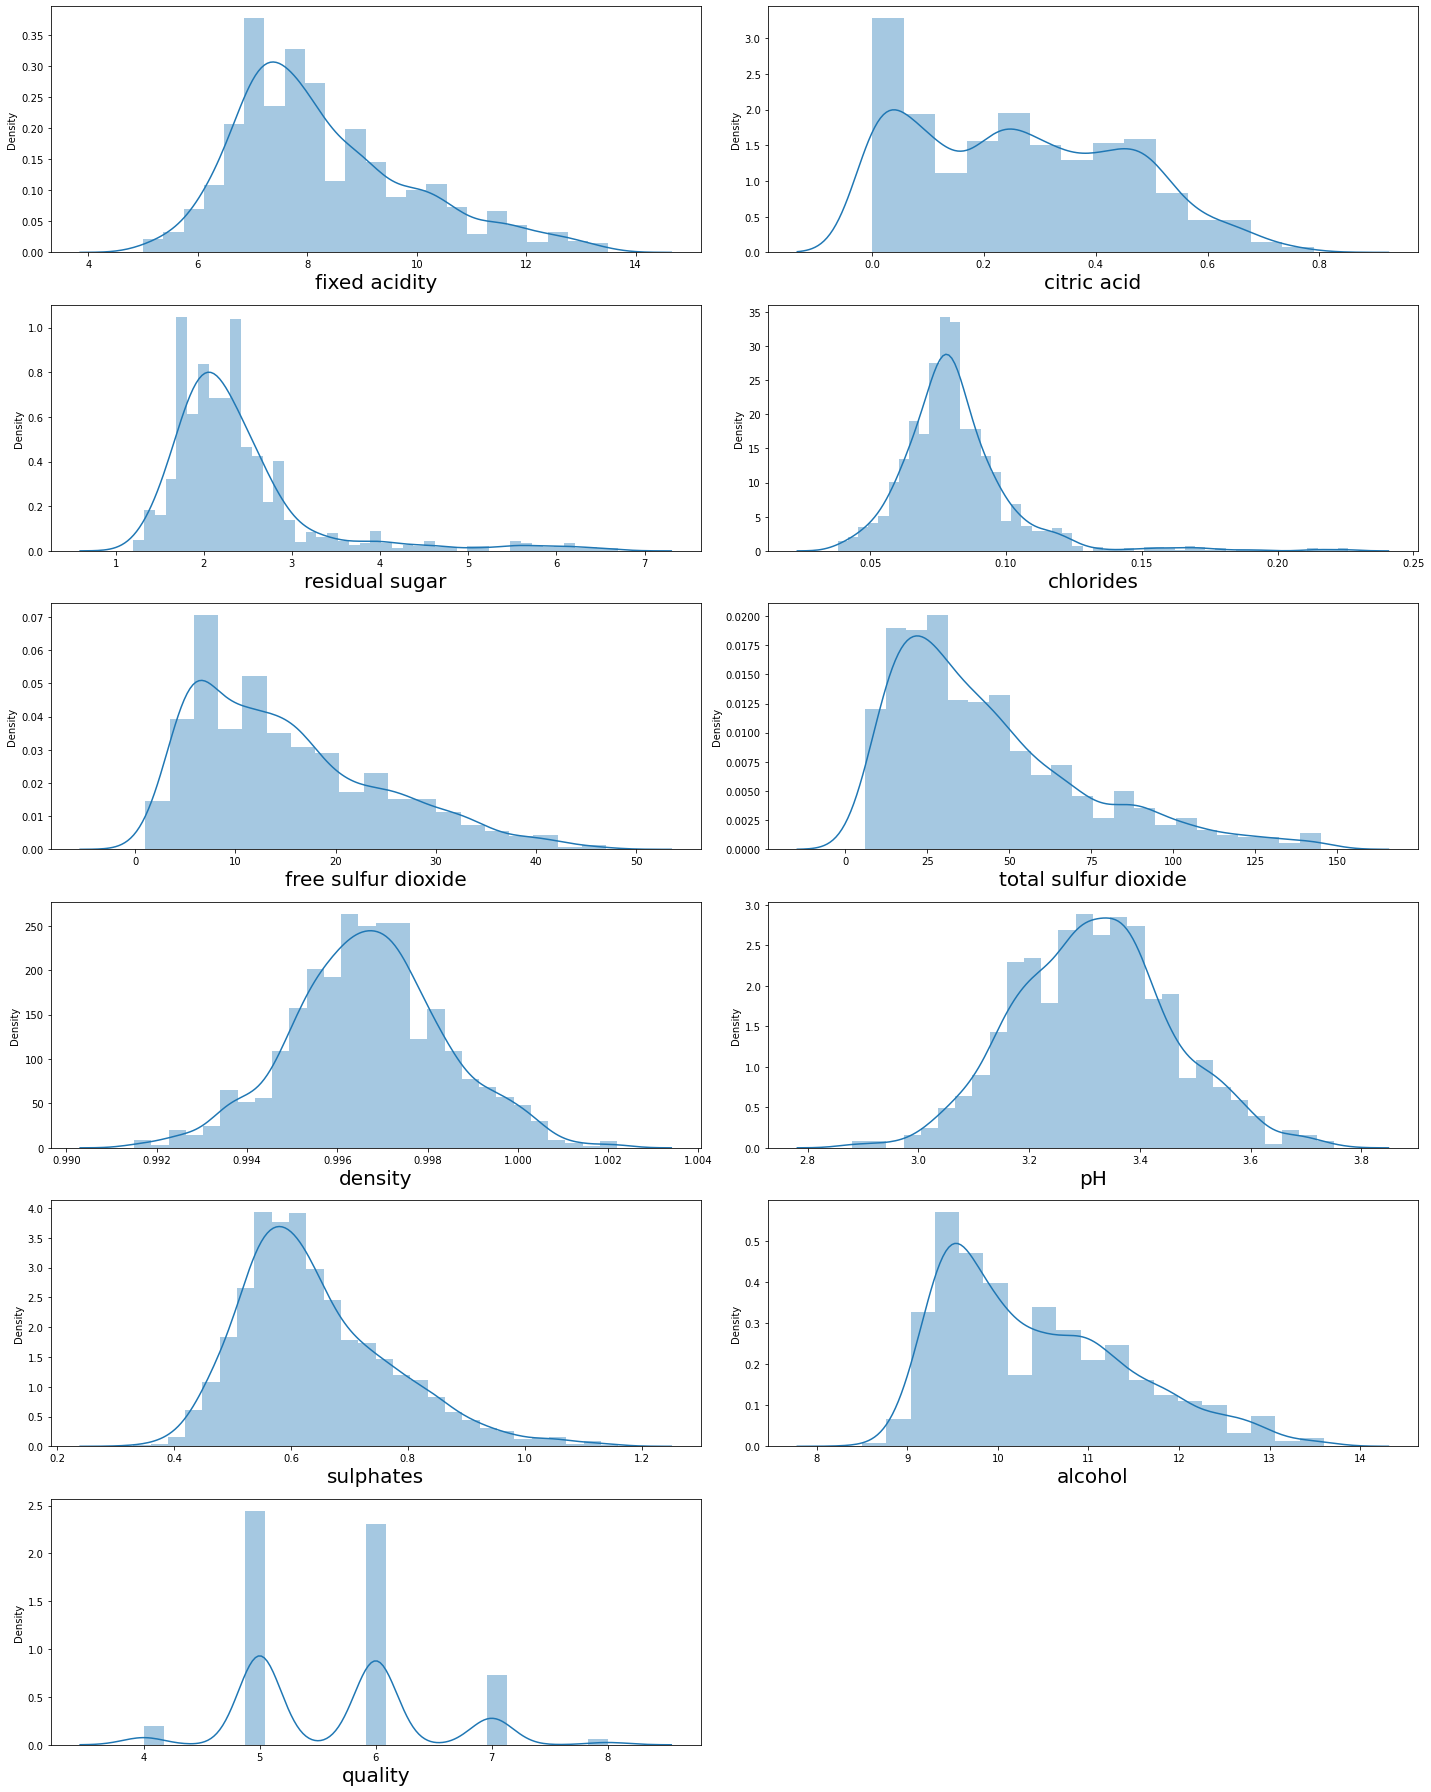

In [40]:
plt.figure(figsize=(20,25))
plot_no = 1
for column in wine_df_new:
    if plot_no <= 12:
        ax = plt.subplot(6,2,plot_no)
        sns.distplot(wine_df_new[column])
        plt.xlabel(column, fontsize = 20)

    plot_no += 1
plt.tight_layout()

- After removing outliers, few features are normally distributed. Others are still skewed

In [41]:
wine_df_new['residual sugar'] = np.sqrt(wine_df_new['residual sugar'])
wine_df_new['chlorides'] = np.sqrt(wine_df_new['chlorides'])
wine_df_new['total sulfur dioxide'] = np.sqrt(wine_df_new['total sulfur dioxide'])

In [42]:
wine_df_new.skew()

fixed acidity           0.827264
citric acid             0.297781
residual sugar          1.835274
chlorides               1.333708
free sulfur dioxide     0.873162
total sulfur dioxide    0.558103
density                 0.061110
pH                      0.109577
sulphates               0.891997
alcohol                 0.754976
quality                 0.400875
dtype: float64

###### Changing the target variable into good and not good

In [43]:
# Binary classification of target varaible
wine_df_new['quality'] = pd.cut(wine_df['quality'], bins = (2,6,8), labels = ['not good', 'good'])
wine_df_new.sample(5)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
236,7.2,0.00,1.378405,0.311448,14.0,6.164414,0.99675,3.37,0.58,9.0,not good
1529,7.1,0.08,1.449138,0.250998,42.0,7.211103,0.99608,3.42,0.60,10.2,not good
403,11.4,0.49,1.643168,0.291548,10.0,6.403124,0.99940,3.15,0.63,10.5,not good
1139,8.2,0.24,1.414214,0.281069,16.0,9.273618,0.99764,3.34,0.64,9.5,not good
978,7.0,0.32,1.897367,0.246982,9.0,5.385165,0.99416,3.28,0.49,11.3,good


not good    1257
good         201
Name: quality, dtype: int64


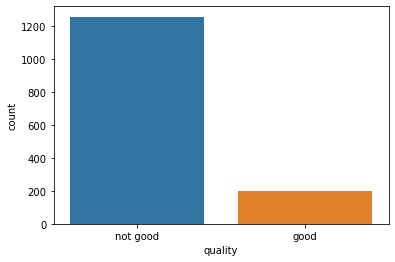

In [44]:
sns.countplot(wine_df_new['quality'])
print(wine_df_new['quality'].value_counts())

In [45]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_df_new['quality']=le.fit_transform(wine_df_new['quality'])
wine_df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.378405,0.275681,11.0,5.830952,0.99780,3.51,0.56,9.4,1
1,7.8,0.00,1.612452,0.313050,25.0,8.185353,0.99680,3.20,0.68,9.8,1
2,7.8,0.04,1.516575,0.303315,15.0,7.348469,0.99700,3.26,0.65,9.8,1
3,11.2,0.56,1.378405,0.273861,17.0,7.745967,0.99800,3.16,0.58,9.8,1
4,7.4,0.00,1.378405,0.275681,11.0,5.830952,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,1.414214,0.300000,32.0,6.633250,0.99490,3.45,0.58,10.5,1
1595,5.9,0.10,1.483240,0.248998,39.0,7.141428,0.99512,3.52,0.76,11.2,1
1596,6.3,0.13,1.516575,0.275681,29.0,6.324555,0.99574,3.42,0.75,11.0,1
1597,5.9,0.12,1.414214,0.273861,32.0,6.633250,0.99547,3.57,0.71,10.2,1


1    1257
0     201
Name: quality, dtype: int64


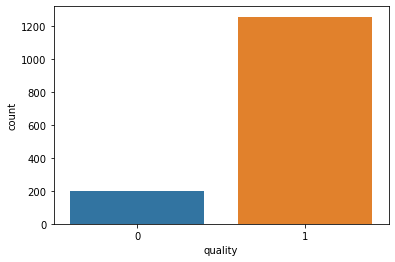

In [46]:
sns.countplot(wine_df_new['quality'])
print(wine_df_new['quality'].value_counts())

- Encoding: 'not good' = 1 and 'good'=0

### Dividing data in features & vectors

In [47]:
x = wine_df_new.iloc[:,:-1]
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,1.378405,0.275681,11.0,5.830952,0.99780,3.51,0.56,9.4
1,7.8,0.00,1.612452,0.313050,25.0,8.185353,0.99680,3.20,0.68,9.8
2,7.8,0.04,1.516575,0.303315,15.0,7.348469,0.99700,3.26,0.65,9.8
3,11.2,0.56,1.378405,0.273861,17.0,7.745967,0.99800,3.16,0.58,9.8
4,7.4,0.00,1.378405,0.275681,11.0,5.830952,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,1.414214,0.300000,32.0,6.633250,0.99490,3.45,0.58,10.5
1595,5.9,0.10,1.483240,0.248998,39.0,7.141428,0.99512,3.52,0.76,11.2
1596,6.3,0.13,1.516575,0.275681,29.0,6.324555,0.99574,3.42,0.75,11.0
1597,5.9,0.12,1.414214,0.273861,32.0,6.633250,0.99547,3.57,0.71,10.2


In [48]:
y= wine_df_new.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1458, dtype: int32

#### Scaling the data using MinMaxScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler
mms_wine = MinMaxScaler()
x = mms_wine.fit_transform(x)
x

array([[0.28235294, 0.        , 0.18952547, ..., 0.72413793, 0.27710843,
        0.17647059],
       [0.32941176, 0.        , 0.34628912, ..., 0.36781609, 0.42168675,
        0.25490196],
       [0.32941176, 0.05063291, 0.2820714 , ..., 0.43678161, 0.38554217,
        0.25490196],
       ...,
       [0.15294118, 0.16455696, 0.2820714 , ..., 0.62068966, 0.5060241 ,
        0.49019608],
       [0.10588235, 0.15189873, 0.21351   , ..., 0.79310345, 0.45783133,
        0.33333333],
       [0.11764706, 0.59493671, 0.53712423, ..., 0.5862069 , 0.39759036,
        0.49019608]])

In [50]:
# Applying SMOTE since the target variable is imbalanced
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_sample(x,y)
y1

0       1
1       1
2       1
3       1
4       1
       ..
2509    0
2510    0
2511    0
2512    0
2513    0
Name: quality, Length: 2514, dtype: int32

1    1257
0    1257
Name: quality, dtype: int64


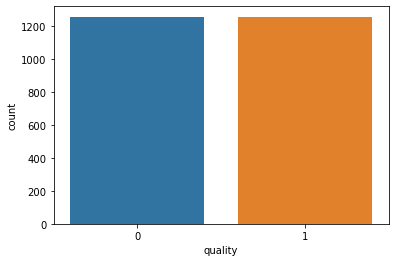

In [51]:
sns.countplot(y1)
print(y1.value_counts())

- Now the data is balanced we can proceed with model building

### Model Building

In [52]:
# Importing the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

model = [lg, gnb, svc, dtc, knn, rfc]

x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size= 0.3, random_state=55)

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    pred = m.predict(x_test)
    print("Accuracy score of ", m, 'is:')
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')

Accuracy score of  LogisticRegression() is:
0.8105960264900662
[[318  72]
 [ 71 294]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       390
           1       0.80      0.81      0.80       365

    accuracy                           0.81       755
   macro avg       0.81      0.81      0.81       755
weighted avg       0.81      0.81      0.81       755



Accuracy score of  GaussianNB() is:
0.8119205298013245
[[323  67]
 [ 75 290]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       390
           1       0.81      0.79      0.80       365

    accuracy                           0.81       755
   macro avg       0.81      0.81      0.81       755
weighted avg       0.81      0.81      0.81       755



Accuracy score of  SVC() is:
0.8649006622516556
[[345  45]
 [ 57 308]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       39

- Out of the 6 models tested the Random forest classifier is giving better accuracy. Hence we can proceed with the deploying the model after cross validation

##### Best Random state

In [58]:
# Maximum accuracy
maxAccu = 0 

# Best random state value for which accuracy is achieved 
maxRS = 0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size= 0.3, random_state=i)
    rfc.fit(x_train, y_train)
    pred_rfc1 = rfc.predict(x_test)
    acc = accuracy_score(y_test, pred_rfc1)
    print(f"Accuracy score of {rfc} is {acc} at Random state {i}")
    
    if acc > maxAccu:
          maxAccu=acc
          maxRS = i
          print(f"Maximum Accuracy score of {rfc} is {acc} at Random state {i}")

Accuracy score of RandomForestClassifier() is 0.9576158940397351 at Random state 1
Maximum Accuracy score of RandomForestClassifier() is 0.9576158940397351 at Random state 1
Accuracy score of RandomForestClassifier() is 0.9470198675496688 at Random state 2
Accuracy score of RandomForestClassifier() is 0.9364238410596026 at Random state 3
Accuracy score of RandomForestClassifier() is 0.919205298013245 at Random state 4
Accuracy score of RandomForestClassifier() is 0.9218543046357616 at Random state 5
Accuracy score of RandomForestClassifier() is 0.9350993377483444 at Random state 6
Accuracy score of RandomForestClassifier() is 0.9403973509933775 at Random state 7
Accuracy score of RandomForestClassifier() is 0.928476821192053 at Random state 8
Accuracy score of RandomForestClassifier() is 0.9430463576158941 at Random state 9
Accuracy score of RandomForestClassifier() is 0.9218543046357616 at Random state 10
Accuracy score of RandomForestClassifier() is 0.9417218543046357 at Random state

##### Cross validation

In [61]:
# Before proceeding with the hpyer parameter tunning we will check for cross validation
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for j in range(2,15):
    cv_score = cross_val_score(rfc, x1,y1,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print('\n') 
    
    if cv_mean > max_cvscore:
        max_cvscore=cv_mean
        max_cv = j
        print(f"At cross fold {j} the Maximum CV score is { max_cvscore}")

At cross fold 2 the cv score is 0.841686555290374


At cross fold 2 the Maximum CV score is 0.841686555290374
At cross fold 3 the cv score is 0.9029435163086714


At cross fold 3 the Maximum CV score is 0.9029435163086714
At cross fold 4 the cv score is 0.9065028404200379


At cross fold 4 the Maximum CV score is 0.9065028404200379
At cross fold 5 the cv score is 0.9101027302321528


At cross fold 5 the Maximum CV score is 0.9101027302321528
At cross fold 6 the cv score is 0.9180588703261735


At cross fold 6 the Maximum CV score is 0.9180588703261735
At cross fold 7 the cv score is 0.9168468408719105


At cross fold 8 the cv score is 0.9184397432008897


At cross fold 8 the Maximum CV score is 0.9184397432008897
At cross fold 9 the cv score is 0.921236559139785


At cross fold 9 the Maximum CV score is 0.921236559139785
At cross fold 10 the cv score is 0.9240071460190983


At cross fold 10 the Maximum CV score is 0.9240071460190983
At cross fold 11 the cv score is 0.9235825271794016



- Maximum accuracy is at Cross Validation 12 

##### Hyper parameter tunning

In [62]:
# Now further using random forest classifier for 
from sklearn.model_selection import GridSearchCV

# creating parameter list to pass i GridSearchCV
parameters = { 'max_features':['auto', 'sqrt', 'log2'],
             'max_depth': [4,5,6,7,8],
             'criterion': ['gini', 'entropy'],
              'n_estimators':[100,200,300,400,500]}

In [63]:
gcv_rf = GridSearchCV(rfc,
                     parameters,
                     cv=12,
                     scoring= 'accuracy')

gcv_rf.fit(x_train, y_train)
# Getting the best parameters
gcv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [64]:
gcv_rf.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=300)

In [66]:
gcv_rf_pred=gcv_rf.best_estimator_.predict(x_test)

print('Final Accuracy with Random Forest Classifier')
accuracy_score(y_test,gcv_rf_pred)

Final Accuracy with Random Forest Classifier


0.919205298013245

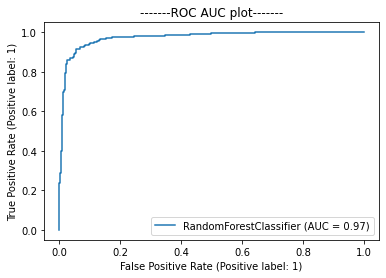

In [67]:
##### ROC ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv_rf.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

#### Pickling and final conclusion

In [68]:
# Pickling of the file or serialization of a file
import joblib
joblib.dump(gcv_rf.best_estimator_,"RedWineQuality.pkl")

['RedWineQuality.pkl']

In [71]:
wine_model = joblib.load('RedWineQuality.pkl')
wine_result = wine_model.score(x_test, y_test)
print(wine_result*100)

91.9205298013245


In [75]:
wine_conclusion = pd.DataFrame([wine_model.predict(x_test),y_test], index=['Predicted', 'Original'])
wine_conclusion

,0,1,2,3,4,5,6,7,8,9,...,745,746,747,748,749,750,751,752,753,754
Predicted,0,1,1,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,1
Original,0,1,1,0,1,0,0,0,1,1,...,1,0,0,1,0,0,0,1,0,1


##### Thank You